In [ ]:
!pip install numpy pandas matplotlib seaborn scikit-learn statsmodels

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
no_gas_compo_data = pd.read_excel('Dataset/NonCatalytic.xlsx')
data = no_gas_compo_data.copy()

In [29]:
#drop row where NO. == NaN
data = data.dropna(subset=['NO.'])

In [31]:
#removing empty rows
data = data.dropna(how='all')
data

,NO.,biomass,waste plastics,MB,VB,FCB,AshB,CB,HB,NB,...,HR,HTT,GAS,OIL,CHAR,CO,CO2,H2,CH4,DOI
1,1.0,Biomasses of empty fruit bunch,Low-density polyethylene,4.52,71.35,20.43,3.71,45.3,7.86,2.3,...,10,540,18.4,67.1,14.5,NaN,NaN,NaN,NaN,http://doi.org/10.1016/j.arabjc.2021.103282
2,2.0,Biomasses of empty fruit bunch,Low-density polyethylene,4.52,71.35,20.43,3.71,45.3,7.86,2.3,...,10,540,15.4,82.6,2,NaN,NaN,NaN,NaN,http://doi.org/10.1016/j.arabjc.2021.103282
3,3.0,Biomasses of empty fruit bunch,Polyethylene,4.52,71.35,20.43,3.71,45.3,7.86,2.3,...,10,540,25.9,59.8,14.3,NaN,NaN,NaN,NaN,http://doi.org/10.1016/j.arabjc.2021.103282
4,4.0,Biomasses of empty fruit bunch,Polyethylene,4.52,71.35,20.43,3.71,45.3,7.86,2.3,...,10,540,21.6,75.3,3.1,NaN,NaN,NaN,NaN,http://doi.org/10.1016/j.arabjc.2021.103282
5,5.0,Palm fond,Low-density polyethylene,7.51,73.32,14.11,5.06,39.1,6.74,2.3,...,10,540,19.9,65,15.1,NaN,NaN,NaN,NaN,http://doi.org/10.1016/j.arabjc.2021.103282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,248.0,Mahua seed,Waste polystyrene,5.65,91.76,1.1,1.49,55.87,7.94,2.74,...,25,525,0.5,99.5,0,NaN,NaN,NaN,NaN,https://doi.org/10.1063/1.4900550
249,249.0,Mahua seed,Waste polystyrene,5.65,91.76,1.1,1.49,55.87,7.94,2.74,...,25,525,12.84,71.74,15.42,NaN,NaN,NaN,NaN,https://doi.org/10.1063/1.4900550
250,250.0,Mahua seed,Waste polystyrene,5.65,91.76,1.1,1.49,55.87,7.94,2.74,...,25,525,15.53,67.52,16.95,NaN,NaN,NaN,NaN,https://doi.org/10.1063/1.4900550
251,251.0,Mahua seed,Waste polystyrene,5.65,91.76,1.1,1.49,55.87,7.94,2.74,...,25,525,19.66,59.28,21.06,NaN,NaN,NaN,NaN,https://doi.org/10.1063/1.4900550


In [32]:
data.columns

Index(['NO.', 'biomass', 'waste plastics', 'MB', 'VB', 'FCB', 'AshB', 'CB',
       'HB', 'NB', 'SB', 'OB', 'PR', 'MP', 'CP', 'HP', 'NP', 'SP', 'OP',
       'AshP', 'VP', 'FCP', 'T', 'HR', 'HTT', 'GAS', 'OIL', 'CHAR', 'CO',
       'CO2', 'H2', 'CH4', 'DOI'],
      dtype='object')

In [33]:
data.drop(columns=['NO.', 'DOI'], axis=1, inplace=True)

In [34]:
data.columns

Index(['biomass', 'waste plastics', 'MB', 'VB', 'FCB', 'AshB', 'CB', 'HB',
       'NB', 'SB', 'OB', 'PR', 'MP', 'CP', 'HP', 'NP', 'SP', 'OP', 'AshP',
       'VP', 'FCP', 'T', 'HR', 'HTT', 'GAS', 'OIL', 'CHAR', 'CO', 'CO2', 'H2',
       'CH4'],
      dtype='object')

In [35]:
#predictive_columns are the columns that we will use to predict the target variable i.e. GAS', 'OIL', 'CHAR', 'CO', 'CO2', 'H2','CH4'
predictive_columns = ['GAS', 'OIL', 'CHAR', 'CO', 'CO2', 'H2', 'CH4']
X = data.drop(columns=predictive_columns)

In [37]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 1 to 252
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   biomass         252 non-null    object 
 1   waste plastics  252 non-null    object 
 2   MB              252 non-null    object 
 3   VB              252 non-null    object 
 4   FCB             252 non-null    object 
 5   AshB            252 non-null    object 
 6   CB              252 non-null    object 
 7   HB              252 non-null    object 
 8   NB              252 non-null    object 
 9   SB              252 non-null    object 
 10  OB              252 non-null    object 
 11  PR              252 non-null    float64
 12  MP              252 non-null    object 
 13  CP              252 non-null    object 
 14  HP              252 non-null    object 
 15  NP              252 non-null    object 
 16  SP              252 non-null    object 
 17  OP              252 non-null    object 


In [40]:
#Numeric encoding of biomass and waste plastics
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['biomass'] = le.fit_transform(X['biomass'])
X['waste plastics'] = le.fit_transform(X['waste plastics'])

In [42]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 1 to 252
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   biomass         252 non-null    int64  
 1   waste plastics  252 non-null    int64  
 2   MB              252 non-null    object 
 3   VB              252 non-null    object 
 4   FCB             252 non-null    object 
 5   AshB            252 non-null    object 
 6   CB              252 non-null    object 
 7   HB              252 non-null    object 
 8   NB              252 non-null    object 
 9   SB              252 non-null    object 
 10  OB              252 non-null    object 
 11  PR              252 non-null    float64
 12  MP              252 non-null    object 
 13  CP              252 non-null    object 
 14  HP              252 non-null    object 
 15  NP              252 non-null    object 
 16  SP              252 non-null    object 
 17  OP              252 non-null    object 


In [43]:
#converting all columns to numeric
X = X.apply(pd.to_numeric, errors='coerce')
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 1 to 252
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   biomass         252 non-null    int64  
 1   waste plastics  252 non-null    int64  
 2   MB              252 non-null    float64
 3   VB              252 non-null    float64
 4   FCB             252 non-null    float64
 5   AshB            252 non-null    float64
 6   CB              252 non-null    float64
 7   HB              252 non-null    float64
 8   NB              252 non-null    float64
 9   SB              252 non-null    float64
 10  OB              252 non-null    float64
 11  PR              252 non-null    float64
 12  MP              252 non-null    float64
 13  CP              252 non-null    float64
 14  HP              252 non-null    float64
 15  NP              252 non-null    float64
 16  SP              252 non-null    float64
 17  OP              252 non-null    float64


In [44]:
#normalisation of data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   biomass         252 non-null    float64
 1   waste plastics  252 non-null    float64
 2   MB              252 non-null    float64
 3   VB              252 non-null    float64
 4   FCB             252 non-null    float64
 5   AshB            252 non-null    float64
 6   CB              252 non-null    float64
 7   HB              252 non-null    float64
 8   NB              252 non-null    float64
 9   SB              252 non-null    float64
 10  OB              252 non-null    float64
 11  PR              252 non-null    float64
 12  MP              252 non-null    float64
 13  CP              252 non-null    float64
 14  HP              252 non-null    float64
 15  NP              252 non-null    float64
 16  SP              252 non-null    float64
 17  OP              252 non-null    flo

In [45]:
y = data['GAS']

In [48]:
y = y.apply(pd.to_numeric, errors='coerce')
y.info()

<class 'pandas.core.series.Series'>
Index: 252 entries, 1 to 252
Series name: GAS
Non-Null Count  Dtype  
--------------  -----  
252 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


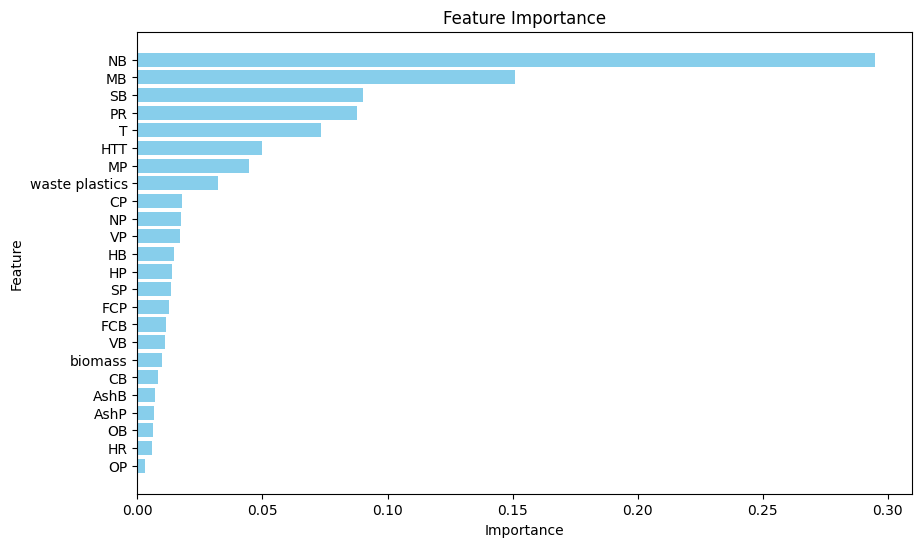

In [49]:
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_scaled, y)

# Get feature importances
importances = model.feature_importances_
feature_names = X_scaled.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [54]:
!pip install shap

  Using cached shap-0.49.1-cp310-cp310-macosx_11_0_arm64.whl.metadata (25 kB)
  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
  Using cached numba-0.63.1-cp310-cp310-macosx_11_0_arm64.whl.metadata (2.9 kB)
  Using cached llvmlite-0.46.0-cp310-cp310-macosx_11_0_arm64.whl.metadata (5.0 kB)
Using cached shap-0.49.1-cp310-cp310-macosx_11_0_arm64.whl (556 kB)
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)
Using cached numba-0.63.1-cp310-cp310-macosx_11_0_arm64.whl (2.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.2/37.2 MB 18.7 MB/s eta 0:00:0000:0100:01


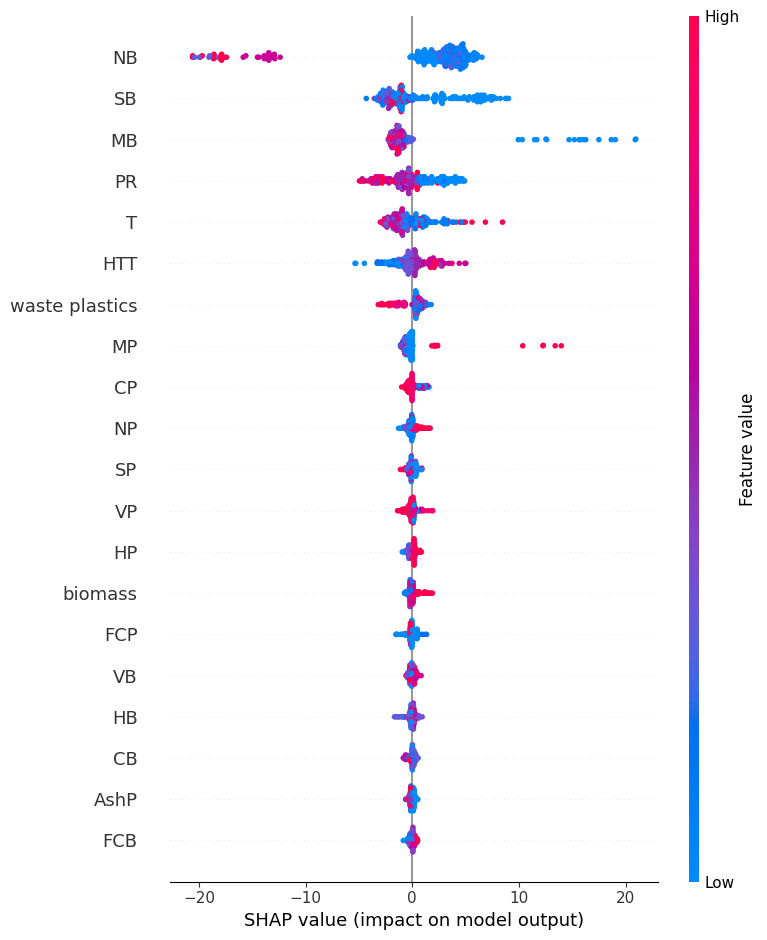

In [55]:
import shap

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(model)

# Calculate SHAP values
shap_values = explainer.shap_values(X_scaled)

# Summary plot of SHAP values
shap.summary_plot(shap_values, X_scaled, feature_names=feature_names)
